In [1]:
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib.font_manager import FontProperties

# custom_rcParams = {
#     'font.family' : 'HK Grotesk',
#     'font.weight' : 'bold',
#     'figure.dpi': 150,
#     'axes.labelsize': 'medium',
#     'axes.titlesize': 'large',
#     'axes.grid': True,
#     'lines.linewidth': 1.5,
#     'lines.marker': 'None',
#     'lines.markersize': 6,
#     'legend.loc': 'best',
#     'font.size': 12
# }
# plt.rcParams.update(custom_rcParams)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'


# Load EEG data in EEGLAB .set format
eeglab_file_path = 'EEG_Data_2/decreased_cognition/p2407.set'
raw = mne.io.read_raw_eeglab(eeglab_file_path, preload=True);
raw.drop_channels(ch_names=['A1', 'A2']);

Reading C:\1_Matlab_function\fooof_mat-main\fooof_mat-main\ex\plotFunction\python\EEG_Data_2\decreased_cognition\p2407.fdt
Reading 0 ... 47455  =      0.000 ...   189.820 secs...


C:\Users\Admin\AppData\Local\Temp\ipykernel_11472\3960251174.py:29: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeglab_file_path, preload=True);


In [2]:
import numpy as np

# Chuỗi giá trị
values_str = '''0.925444982481031
2.08182251954949
0.917701754235275
0.0631460493966595
3.78805861238268
1.44613069716177
3.34222747919902
4.25226938675307
1.27067253386748
0.264783857564834
0.135187352610350
2.21107853375739
0.0718288426656706
0.742331676289944
0.304565008532648
0.199915154005653
2.13024308507330
1.68828939770812
1.69299591301815'''

# Chuyển đổi chuỗi thành mảng NumPy
p_values = np.array([float(value) for value in values_str.split('\n')])

p_values.shape


(19,)

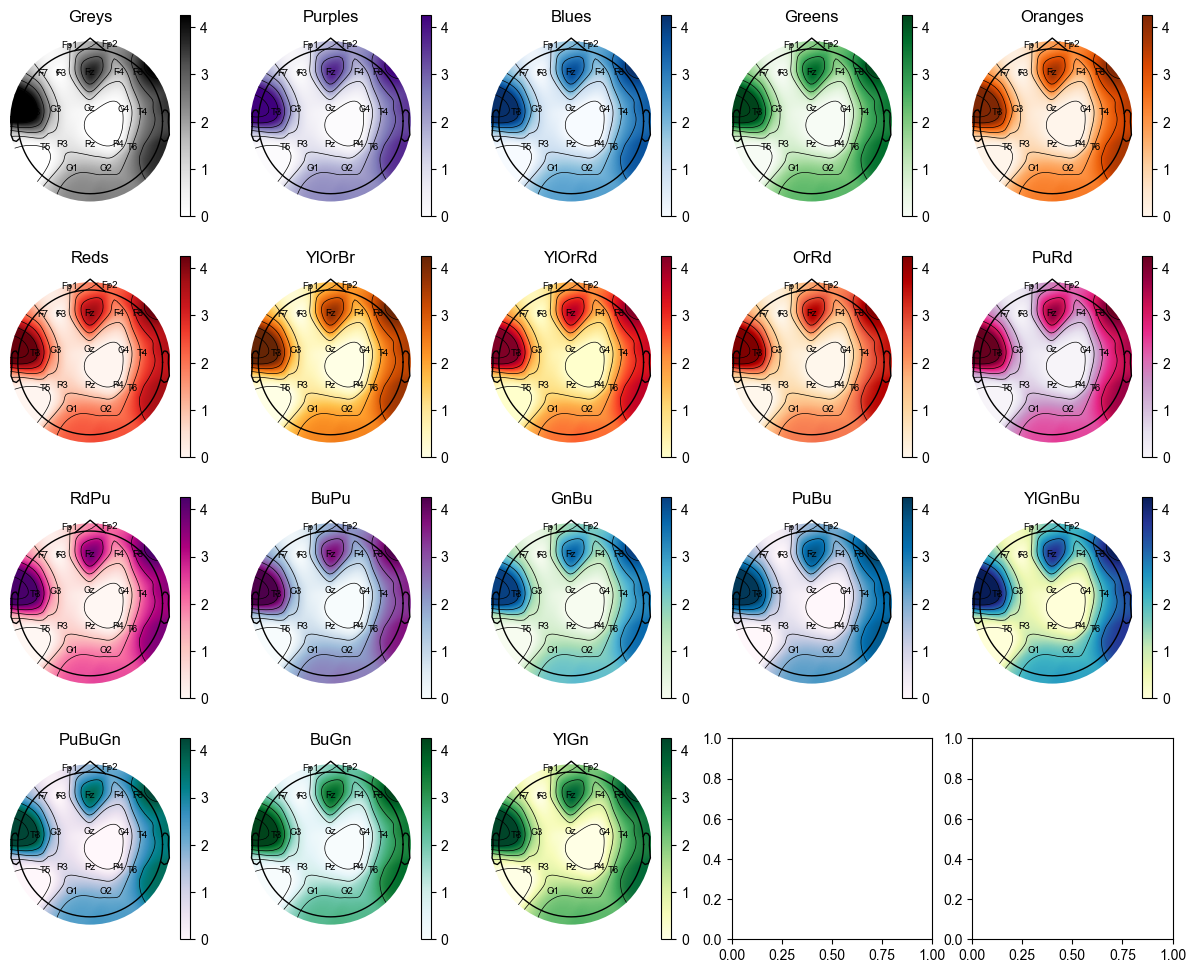

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import mne

# Manually create a custom montage with 10-20 EEG system electrode positions
montage = mne.channels.make_standard_montage('standard_1020')

# Set the montage to the raw data
raw.set_montage(montage)
info = raw.info

# Tạo subplot để vẽ topomap
num_columns = 5 
num_rows = 4

cmaps1= ['viridis', 'plasma', 'inferno', 'magma', 'cividis']
cmaps2= ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                      'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
cmaps3= ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
                      'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
                      'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper']
cmaps4= ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu',
                      'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']
cmaps5= ['twilight', 'twilight_shifted', 'hsv']


fig, axes = plt.subplots(nrows= num_rows, ncols=num_columns, figsize=(3.0*num_columns, 3.0*num_rows))

for idx, cmap in enumerate(cmaps2):
    ax = axes.flatten()[idx]
    im, _ = mne.viz.plot_topomap(p_values, info, axes=ax, show=False, names=info['ch_names'], cmap=cmap)
    ax.set_title(cmap)
    plt.colorbar(im, ax=ax, orientation='vertical', pad=0.05)

# Hiển thị topomap
plt.show()


In [23]:
topoDataFull = pd.read_csv('topoData/topoEXP.csv', header=None)

title = ['MS cog+', 'MS cog-', '-log(p-Value)', 'HC', 'AD', '-log(p-Value)', 'HC', 'FT', '-log(p-Value)']

In [24]:
# topoData = topoDataFull.iloc[:, :6]
topoData = topoDataFull
# title = ['MS cog+', 'MS cog-', '-log(p-Value)', 'HC', 'AD', '-log(p-Value)']

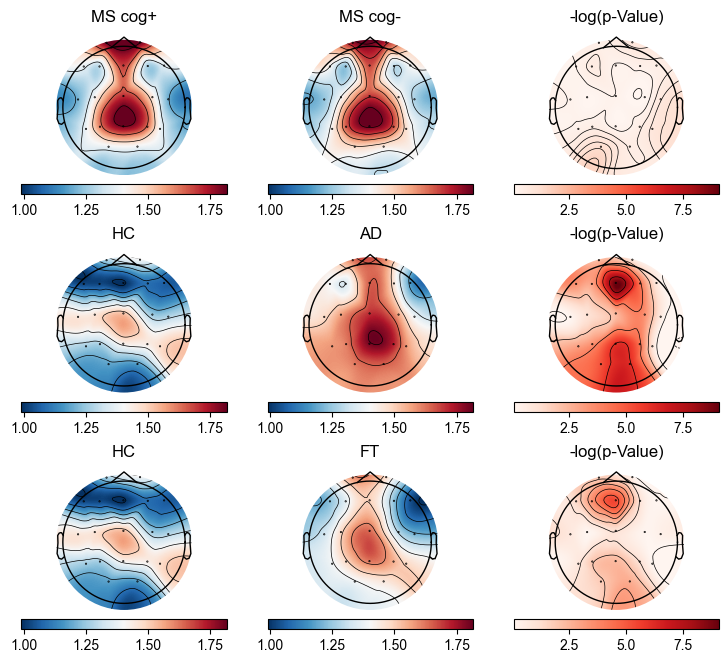

In [28]:

num_columns = 3
num_rows = 3
fig, axes = plt.subplots(nrows= num_rows, ncols=num_columns, figsize=(9, 8))

for idx in range(topoData.shape[1]):
    if idx in [2,5,8]:
        min_exp = topoData.iloc[:, [2,5,8]].min().min()
        max_exp = topoData.iloc[:, [2,5,8]].max().max()
        cmap_name = 'Reds'
    else:
        cmap_name = 'RdBu_r'
        min_exp = topoData.iloc[:, [0,1,3,4,6,7]].min().min()
        max_exp = topoData.iloc[:, [0,1,3,4,6,7]].max().max()
        
    data = topoData.iloc[:, idx]
    ax = axes.flatten()[idx]
    im, _ = mne.viz.plot_topomap(data, info, axes=ax, show=False, cmap= cmap_name, vlim=(min_exp,max_exp) )
    ax.set_title(title[idx])
    plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.05)


plt.savefig('topoplot.png')
# Hiển thị topomap
plt.show()